piloto_id

## Global

In [172]:
# Import das bibliotecas base:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
#Import dos arquivos csv
pilotos = pd.read_csv('./bases/drivers.csv')
piloto_classificacoes = pd.read_csv('./bases/driver_standings.csv')
sprint_resultados = pd.read_csv('./bases/sprint_results.csv')
parada_boxes = pd.read_csv('./bases/pit_stops.csv')
qualificacao = pd.read_csv('./bases/qualifying.csv')
status = pd.read_csv('./bases/status.csv') #Possivel exclusão
temporadas = pd.read_csv('./bases/seasons.csv') #Possivel exclusão
construtores = pd.read_csv('./bases/constructors.csv')

## Tratamento de dados/Limpeza

Tabelas a serem tratadas, limpas e análisadas serão:
pilotos, pilotos_classificacoes, sprint_resultados, parada_boxes, status, temporadas, construtores, construtor_resultados

### T/L tabela DRIVERS (PILOTOS):

Comentários:

É possível excluir as colunas "número" e "código", observação olhar

#### Alterações pré-determinadas:

In [174]:
pilotos

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri


In [175]:
#Colocando as colunas em PT_BR
pilotos.columns = ['pilotoId', 'pilotoRef', 'número', 'código', 'nome', 'sobrenome', 'dt_nascimento', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
pilotos = pilotos.drop('url', axis=1)

In [176]:
pilotos

,pilotoId,pilotoRef,número,código,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,Mick,Schumacher,1999-03-22,German
853,855,zhou,24,ZHO,Guanyu,Zhou,1999-05-30,Chinese
854,856,de_vries,21,DEV,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,PIA,Oscar,Piastri,2001-04-06,Australian


#### Informações sobre as colunas

In [177]:
print("Colunas: ")
pilotos.columns

Colunas: 


Index(['pilotoId', 'pilotoRef', 'número', 'código', 'nome', 'sobrenome',
       'dt_nascimento', 'nacionalidade'],
      dtype='object')

In [178]:
print("Descricao: ")
pilotos.describe()

Descricao: 


,pilotoId
count,857.000000
mean,429.057176
std,247.632402
min,1.000000
25%,215.000000
50%,429.000000
75%,643.000000
max,858.000000


In [179]:
print("Informacoes: ")
pilotos.info()
print("\n")


print("Dimensoes: ")
print(pilotos.shape)
print("\n")

print("Head:")
pilotos.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   pilotoId       857 non-null    int64 
 1   pilotoRef      857 non-null    object
 2   número         857 non-null    object
 3   código         857 non-null    object
 4   nome           857 non-null    object
 5   sobrenome      857 non-null    object
 6   dt_nascimento  857 non-null    object
 7   nacionalidade  857 non-null    object
dtypes: int64(1), object(7)
memory usage: 53.7+ KB


Dimensoes: 
(857, 8)


Head:


,pilotoId,pilotoRef,número,código,nome,sobrenome,dt_nascimento,nacionalidade
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish


In [180]:
#retorna o número de valores ausentes para cada coluna.
pilotos.isna().sum()

pilotoId         0
pilotoRef        0
número           0
código           0
nome             0
sobrenome        0
dt_nascimento    0
nacionalidade    0
dtype: int64

#### Alterações de type nas colunas e nulls

In [217]:
#Colocando os valores "\n" COMO None
pilotos = pilotos.replace('\\N', np.nan)
pilotos = pilotos.replace('<NA>', np.nan)

In [220]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
pilotoId: 0
pilotoRef: 0
número: 803
código: 757
nome: 0
sobrenome: 0
dt_nascimento: 0
nacionalidade: 0


In [219]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in pilotos.columns:
    contagem = pilotos[coluna].astype(str).str.count('nan').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de 'nan' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de 'nan' em cada coluna:
pilotoId: 0
pilotoRef: 2
número: 0
código: 0
nome: 2
sobrenome: 1
dt_nascimento: 0
nacionalidade: 0


In [183]:
#Transformando em String
pilotos['pilotoRef'] = pilotos['pilotoRef'].astype(pd.StringDtype())
pilotos['número'] = pilotos['número'].astype(pd.StringDtype())
pilotos['código'] = pilotos['código'].astype(pd.StringDtype())
pilotos['nome'] = pilotos['nome'].astype(pd.StringDtype())
pilotos['sobrenome'] = pilotos['sobrenome'].astype(pd.StringDtype())
pilotos['nacionalidade'] = pilotos['nacionalidade'].astype(pd.StringDtype())

#Transformando em date, pois está em object
pilotos['dt_nascimento'] = pd.to_datetime(pilotos['dt_nascimento'])

### T/L tabela DRIVERS_STANDINGS (PILOTOS_CLASSIFICADOS):

Comentários:

Todas as colunas fazem sentido, algumas colunas mesmo com muito outsiders fazem sentido porque essas estão diretamente ligada a desempenho, devido a isso faz sentido ter muitos outsiders, já que só alguns conseguiram e conseguirão ter bons desempenhos.

#### Alterações pré-determinadas:

In [184]:
piloto_classificacoes

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [185]:
#Colocando as colunas em PT_BR
piloto_classificacoes.columns = ['piloto_classificacao', 'corridaId', 'pilotoId', 'pontos', 'posição', 'posiçãoTexto', 'vitorias']

#### Informações sobre as colunas

In [186]:
print("Colunas: ")
piloto_classificacoes.columns

Colunas: 


Index(['piloto_classificacao', 'corridaId', 'pilotoId', 'pontos', 'posição',
       'posiçãoTexto', 'vitorias'],
      dtype='object')

In [187]:
print("Descricao: ")
piloto_classificacoes.describe()

Descricao: 


,piloto_classificacao,corridaId,pilotoId,pontos,posição,vitorias
count,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000,34124.000000
mean,42535.650656,572.649396,307.284697,13.489987,19.897169,0.269429
std,21729.601277,284.154765,267.228677,35.599709,16.396017,0.995681
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19649.750000,347.000000,85.000000,0.000000,8.000000,0.000000
50%,49674.500000,595.000000,221.000000,1.000000,16.000000,0.000000
75%,58946.250000,797.000000,509.000000,10.000000,26.000000,0.000000
max,72187.000000,1110.000000,858.000000,454.000000,108.000000,15.000000


In [188]:
print("Informacoes: ")
piloto_classificacoes.info()
print("\n")


print("Dimensoes: ")
print(piloto_classificacoes.shape)
print("\n")

print("Head:")
piloto_classificacoes.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34124 entries, 0 to 34123
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   piloto_classificacao  34124 non-null  int64  
 1   corridaId             34124 non-null  int64  
 2   pilotoId              34124 non-null  int64  
 3   pontos                34124 non-null  float64
 4   posição               34124 non-null  int64  
 5   posiçãoTexto          34124 non-null  object 
 6   vitorias              34124 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


Dimensoes: 
(34124, 7)


Head:


,piloto_classificacao,corridaId,pilotoId,pontos,posição,posiçãoTexto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [189]:
#retorna o número de valores ausentes para cada coluna.
piloto_classificacoes.isna().sum()

piloto_classificacao    0
corridaId               0
pilotoId                0
pontos                  0
posição                 0
posiçãoTexto            0
vitorias                0
dtype: int64

#### Alterações de type nas colunas e nulls

In [190]:
#Colocando os valores "\n" COMO None
piloto_classificacoes = piloto_classificacoes.replace('\\N', np.nan)

In [191]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in piloto_classificacoes.columns:
    contagem = piloto_classificacoes[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
piloto_classificacao: 0
corridaId: 0
pilotoId: 0
pontos: 0
posição: 0
posiçãoTexto: 0
vitorias: 0


In [192]:
piloto_classificacoes

,piloto_classificacao,corridaId,pilotoId,pontos,posição,posiçãoTexto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


In [193]:
#Transformando em String
piloto_classificacoes['posiçãoTexto'] = piloto_classificacoes['posiçãoTexto'].astype(pd.StringDtype())

#### Gráfico e Estátisticas

In [194]:
piloto_classificacoes

,piloto_classificacao,corridaId,pilotoId,pontos,posição,posiçãoTexto,vitorias
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
34119,72183,1110,846,69.0,8,8,0
34120,72184,1110,839,35.0,10,10,0
34121,72185,1110,844,99.0,5,5,0
34122,72186,1110,857,34.0,11,11,0


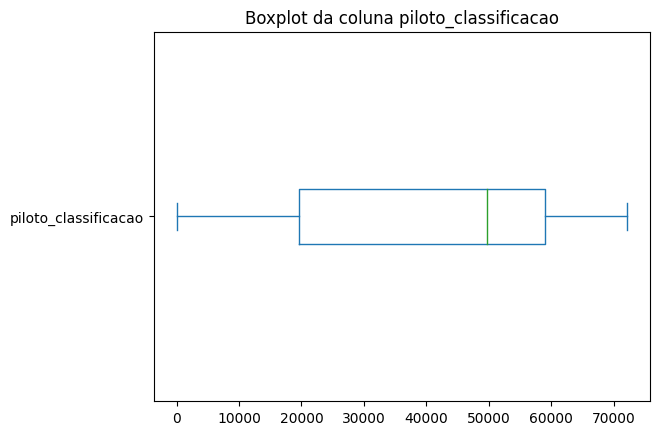

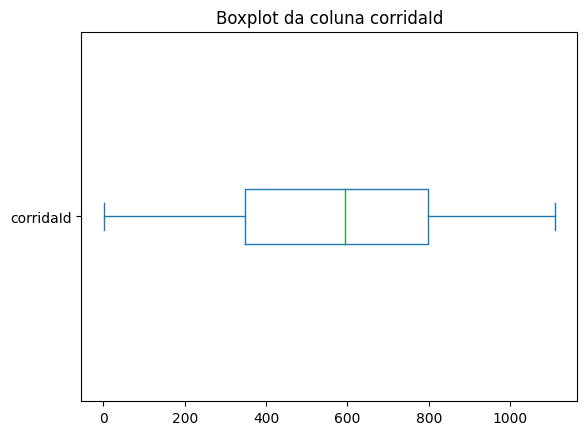

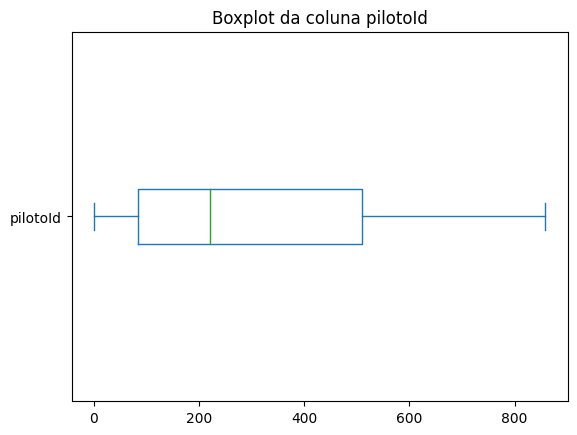

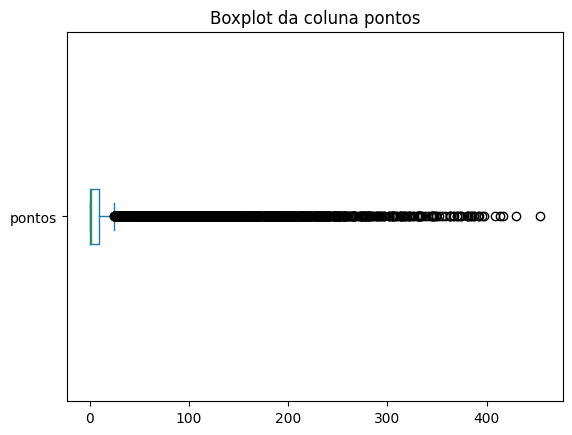

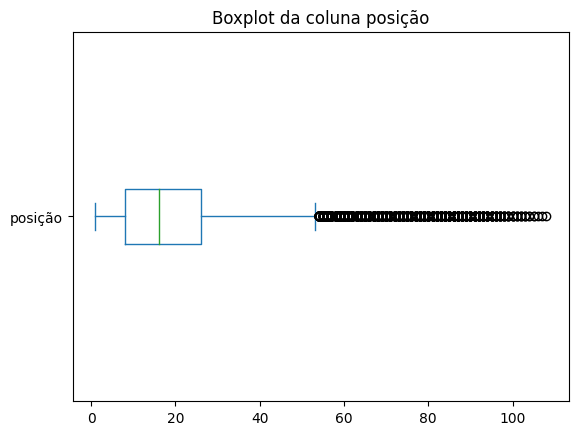

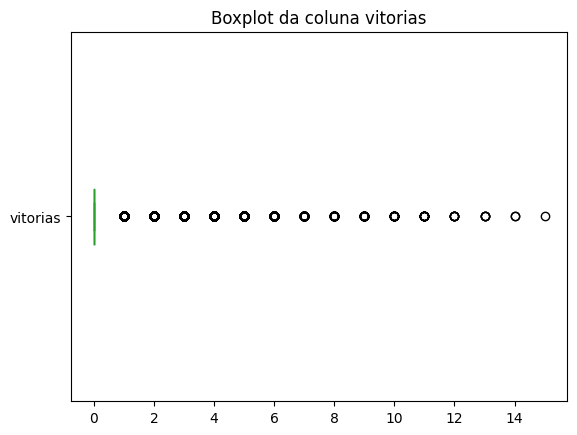

In [195]:
# Crie um boxplot para cada coluna numérica
for coluna in piloto_classificacoes.select_dtypes(include='number'):
    plt.figure()  # Crie uma nova figura para cada boxplot
    piloto_classificacoes[coluna].plot(kind='box', vert=False)
    plt.title(f'Boxplot da coluna {coluna}')

# Exiba os boxplots
plt.show()

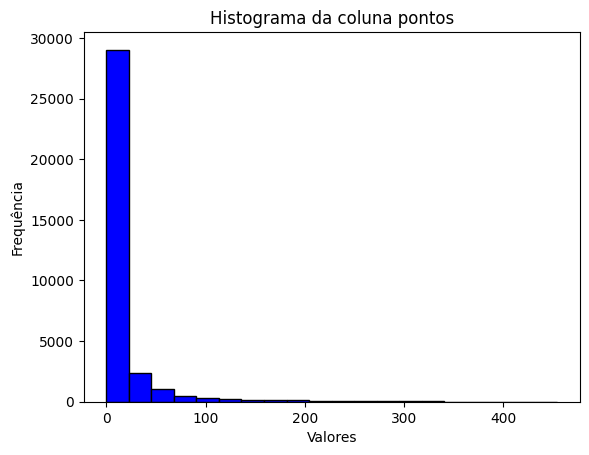

In [196]:
# Criar o histograma
plt.hist(piloto_classificacoes['pontos'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna pontos')

# Mostrar o gráfico
plt.show()

In [197]:
print(piloto_classificacoes['pontos'].max())
print(piloto_classificacoes['pontos'].min())

454.0
0.0


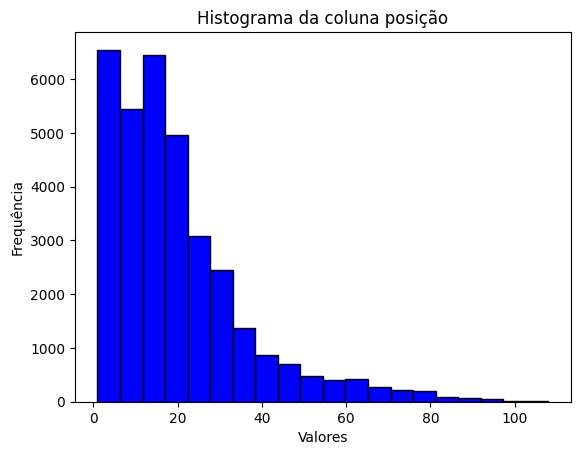

In [198]:
# Criar o histograma
plt.hist(piloto_classificacoes['posição'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna posição')

# Mostrar o gráfico
plt.show()

In [199]:
print(piloto_classificacoes['posição'].max())
print(piloto_classificacoes['posição'].min())

108
1


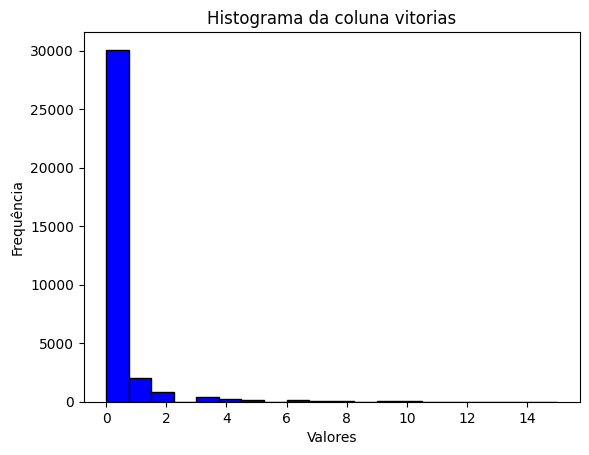

In [200]:
# Criar o histograma
plt.hist(piloto_classificacoes['vitorias'], bins=20, color='blue', edgecolor='black')

# Adicionar rótulos ao gráfico
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.title('Histograma da coluna vitorias')

# Mostrar o gráfico
plt.show()

In [201]:
print(piloto_classificacoes['vitorias'].max())
print(piloto_classificacoes['vitorias'].min())

15
0


### T/L tabela CONSTRUCTORS (CONSTRUTORES):

Coméntarios:
Tabela clean, só precisou derrubar o url e arrumar o types das tabelas

#### Alterações pré-determinadas:

In [202]:
construtores

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [203]:
#Colocando as colunas em PT_BR
construtores.columns = ['construtorId', 'construtorRef', 'nome', 'nacionalidade', 'url']

#Excluindo colunas que não precisam
construtores = construtores.drop('url', axis=1)

In [204]:
construtores

,construtorId,construtorRef,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian
...,...,...,...,...
206,209,manor,Manor Marussia,British
207,210,haas,Haas F1 Team,American
208,211,racing_point,Racing Point,British
209,213,alphatauri,AlphaTauri,Italian


#### Informações sobre as colunas

In [205]:
print("Colunas: ")
construtores.columns

Colunas: 


Index(['construtorId', 'construtorRef', 'nome', 'nacionalidade'], dtype='object')

In [206]:
print("Descricao: ")
construtores.describe()

Descricao: 


,construtorId
count,211.000000
mean,107.037915
std,61.653629
min,1.000000
25%,54.500000
50%,107.000000
75%,159.500000
max,214.000000


In [207]:
print("Informacoes: ")
construtores.info()
print("\n")


print("Dimensoes: ")
print(construtores.shape)
print("\n")

print("Head:")
construtores.head(5)

Informacoes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   construtorId   211 non-null    int64 
 1   construtorRef  211 non-null    object
 2   nome           211 non-null    object
 3   nacionalidade  211 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


Dimensoes: 
(211, 4)


Head:


,construtorId,construtorRef,nome,nacionalidade
0,1,mclaren,McLaren,British
1,2,bmw_sauber,BMW Sauber,German
2,3,williams,Williams,British
3,4,renault,Renault,French
4,5,toro_rosso,Toro Rosso,Italian


In [208]:
#retorna o número de valores ausentes para cada coluna.
construtores.isna().sum()

construtorId     0
construtorRef    0
nome             0
nacionalidade    0
dtype: int64

#### Alterações de type nas colunas e nulls

In [209]:
#Colocando os valores "\n" COMO None
construtores = construtores.replace('\\N', np.nan)

In [210]:
#Calcula e mostra a contagem de <NA>, nulls, por coluna.

# Dicionário para armazenar as contagens por coluna
contagens_por_coluna = {}

# Calcula a contagem de "/N" por coluna
for coluna in construtores.columns:
    contagem = construtores[coluna].astype(str).str.count('<NA>').sum()
    contagens_por_coluna[coluna] = contagem

# Exibe a contagem de <NA> por coluna
print("Contagem de '<NA>' em cada coluna:")
for coluna, contagem in contagens_por_coluna.items():
    print(f"{coluna}: {contagem}")

Contagem de '<NA>' em cada coluna:
construtorId: 0
construtorRef: 0
nome: 0
nacionalidade: 0


In [213]:
construtores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   construtorId   211 non-null    int64 
 1   construtorRef  211 non-null    object
 2   nome           211 non-null    object
 3   nacionalidade  211 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.7+ KB


In [214]:
#Transformando em String
construtores['construtorRef'] = construtores['construtorRef'].astype(pd.StringDtype())
construtores['nome'] = construtores['nome'].astype(pd.StringDtype())
construtores['nacionalidade'] = construtores['nacionalidade'].astype(pd.StringDtype())

In [215]:
construtores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   construtorId   211 non-null    int64 
 1   construtorRef  211 non-null    string
 2   nome           211 non-null    string
 3   nacionalidade  211 non-null    string
dtypes: int64(1), string(3)
memory usage: 6.7 KB
